In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [4]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)

training_set = train_datagen.flow_from_directory('./Skin_Data/Cancer_Non_Cancer/train',
                                                 target_size = (64,64),
                                                 batch_size = 7,
                                                 class_mode = 'binary')

Found 204 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)
test_set = test_datagen.flow_from_directory('./Skin_Data/Cancer_Non_Cancer/test',
                                                 target_size = (64,64),
                                                 batch_size = 7,
                                                 class_mode = 'binary')

Found 84 images belonging to 2 classes.


CNN Model 1

In [7]:
cnn1 = tf.keras.models.Sequential()

cnn1.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=[64, 64, 3]))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn1.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(128, activation='relu'))
cnn1.add(tf.keras.layers.Dense(1, activation='sigmoid'))




In [8]:

cnn1.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [9]:
cnn1.fit(x = training_set, validation_data = test_set, epochs = 400)

Epoch 1/400


30/30 [==============================] - 4s 91ms/step - loss: 0.4920 - accuracy: 0.7990 - val_loss: 1.2908 - val_accuracy: 0.5000
Epoch 2/400
30/30 [==============================] - 1s 27ms/step - loss: 0.5186 - accuracy: 0.7941 - val_loss: 0.9721 - val_accuracy: 0.5000
Epoch 3/400
30/30 [==============================] - 1s 27ms/step - loss: 0.5087 - accuracy: 0.7941 - val_loss: 0.9057 - val_accuracy: 0.5000
Epoch 4/400
30/30 [==============================] - 1s 27ms/step - loss: 0.4873 - accuracy: 0.7941 - val_loss: 0.9843 - val_accuracy: 0.5000
Epoch 5/400
30/30 [==============================] - 1s 27ms/step - loss: 0.4867 - accuracy: 0.7941 - val_loss: 1.1242 - val_accuracy: 0.5000
Epoch 6/400
30/30 [==============================] - 1s 27ms/step - loss: 0.4968 - accuracy: 0.7892 - val_loss: 1.0190 - val_accuracy: 0.5000
Epoch 7/400
30/30 [==============================] - 1s 28ms/step - loss: 0.4742 - accuracy: 0.7941 - val_loss: 0.7665 - val_accuracy: 0.5000
Epoc

In [10]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [11]:
loss, accuracy1 = cnn1.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy1)


12/12 [==============================] - 0s 24ms/step - loss: 1.3146 - accuracy: 0.7381
Test Loss: 1.3145619630813599
Test Accuracy: 0.738095223903656


CNN Model 2

In [20]:
cnn2 = tf.keras.models.Sequential()

cnn2.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=[64, 64, 3]))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn2.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(128, activation='relu'))
cnn2.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [21]:
# Training the CNN
cnn2.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [22]:
cnn2.fit(x = training_set, validation_data = test_set, epochs = 300)

Epoch 1/300
30/30 [==============================] - 2s 32ms/step - loss: 0.5118 - accuracy: 0.7941 - val_loss: 0.8971 - val_accuracy: 0.5000
Epoch 2/300
30/30 [==============================] - 1s 27ms/step - loss: 0.5225 - accuracy: 0.7941 - val_loss: 0.8348 - val_accuracy: 0.5000
Epoch 3/300
30/30 [==============================] - 1s 28ms/step - loss: 0.4843 - accuracy: 0.7941 - val_loss: 0.8435 - val_accuracy: 0.5000
Epoch 4/300
30/30 [==============================] - 1s 29ms/step - loss: 0.4370 - accuracy: 0.7843 - val_loss: 0.6310 - val_accuracy: 0.6548
Epoch 5/300
30/30 [==============================] - 1s 28ms/step - loss: 0.4226 - accuracy: 0.8088 - val_loss: 1.0774 - val_accuracy: 0.5000
Epoch 6/300
30/30 [==============================] - 1s 27ms/step - loss: 0.3771 - accuracy: 0.8284 - val_loss: 1.1054 - val_accuracy: 0.5357
Epoch 7/300
30/30 [==============================] - 1s 27ms/step - loss: 0.3926 - accuracy: 0.8186 - val_loss: 0.6457 - val_accuracy: 0.6786
Epoch 

In [23]:
loss, accuracy2 = cnn2.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy2)


12/12 [==============================] - 0s 21ms/step - loss: 2.4792 - accuracy: 0.6310
Test Loss: 2.4792003631591797
Test Accuracy: 0.6309523582458496


CNN Model 3

In [24]:
cnn3 = tf.keras.models.Sequential()

cnn3.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=[64, 64, 3]))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn3.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
cnn3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn3.add(tf.keras.layers.Flatten())

cnn3.add(tf.keras.layers.Dense(128, activation='relu'))
cnn3.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [25]:
# Training the CNN
cnn3.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [26]:
measures=cnn3.fit(x = training_set, validation_data = test_set, epochs = 400)


Epoch 1/400
30/30 [==============================] - 1s 34ms/step - loss: 0.7115 - accuracy: 0.7255 - val_loss: 0.8178 - val_accuracy: 0.5000
Epoch 2/400
30/30 [==============================] - 1s 28ms/step - loss: 0.5302 - accuracy: 0.7941 - val_loss: 1.2117 - val_accuracy: 0.5000
Epoch 3/400
30/30 [==============================] - 1s 27ms/step - loss: 0.5337 - accuracy: 0.7941 - val_loss: 0.8982 - val_accuracy: 0.5000
Epoch 4/400
30/30 [==============================] - 1s 30ms/step - loss: 0.4985 - accuracy: 0.7941 - val_loss: 0.9363 - val_accuracy: 0.5000
Epoch 5/400
30/30 [==============================] - 1s 30ms/step - loss: 0.4888 - accuracy: 0.7892 - val_loss: 1.1799 - val_accuracy: 0.5000
Epoch 6/400
30/30 [==============================] - 1s 30ms/step - loss: 0.4474 - accuracy: 0.7941 - val_loss: 0.8794 - val_accuracy: 0.5000
Epoch 7/400
30/30 [==============================] - 1s 30ms/step - loss: 0.4245 - accuracy: 0.8088 - val_loss: 0.6037 - val_accuracy: 0.6905
Epoch 

In [27]:
loss, accuracy3 = cnn3.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy3)


12/12 [==============================] - 0s 22ms/step - loss: 4.2473 - accuracy: 0.7500
Test Loss: 4.247260570526123
Test Accuracy: 0.75


CNN model with different parameters with different optimizers

CNN model 4

In [23]:
cnn4 = tf.keras.models.Sequential()

cnn4.add(tf.keras.layers.Conv2D(32, 5, activation='relu', input_shape=[64, 64, 3]))
cnn4.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2))

cnn4.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
cnn4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn4.add(tf.keras.layers.Flatten())

cnn4.add(tf.keras.layers.Dense(256, activation='relu'))
cnn4.add(tf.keras.layers.Dense(128, activation='relu'))
cnn4.add(tf.keras.layers.Dense(1, activation='sigmoid'))


cnn4.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
cnn4.fit(x = training_set, validation_data = test_set, epochs = 200)

Epoch 1/200
30/30 [==============================] - 2s 35ms/step - loss: 0.5558 - accuracy: 0.7941 - val_loss: 0.9472 - val_accuracy: 0.5000
Epoch 2/200
30/30 [==============================] - 1s 30ms/step - loss: 0.5105 - accuracy: 0.7941 - val_loss: 0.8902 - val_accuracy: 0.5000
Epoch 3/200
30/30 [==============================] - 1s 29ms/step - loss: 0.5073 - accuracy: 0.7941 - val_loss: 0.8358 - val_accuracy: 0.5000
Epoch 4/200
30/30 [==============================] - 1s 29ms/step - loss: 0.5086 - accuracy: 0.7941 - val_loss: 1.0415 - val_accuracy: 0.5000
Epoch 5/200
30/30 [==============================] - 1s 32ms/step - loss: 0.5019 - accuracy: 0.7941 - val_loss: 0.9136 - val_accuracy: 0.5000
Epoch 6/200
30/30 [==============================] - 1s 29ms/step - loss: 0.5538 - accuracy: 0.7696 - val_loss: 0.9111 - val_accuracy: 0.5000
Epoch 7/200
30/30 [==============================] - 1s 29ms/step - loss: 0.4951 - accuracy: 0.7941 - val_loss: 0.8984 - val_accuracy: 0.5000
Epoch 

In [63]:
loss, accuracy4 = cnn4.evaluate(test_set)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy4)


12/12 [==============================] - 0s 21ms/step - loss: 0.9695 - accuracy: 0.8214
Test Loss: 0.9694954752922058
Test Accuracy: 0.8214285969734192


CNN Model 5

In [27]:
cnn5 = tf.keras.models.Sequential()

cnn5.add(tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=[64, 64, 3]))
cnn5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn5.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
cnn5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn5.add(tf.keras.layers.Flatten())

cnn5.add(tf.keras.layers.Dense(256, activation='relu'))
cnn5.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile model with Adam optimizer
cnn5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [28]:
cnn5.fit(x = training_set, validation_data = test_set, epochs = 200)

Epoch 1/200
30/30 [==============================] - 2s 34ms/step - loss: 0.5757 - accuracy: 0.7794 - val_loss: 1.4076 - val_accuracy: 0.5000
Epoch 2/200
30/30 [==============================] - 1s 30ms/step - loss: 0.4989 - accuracy: 0.7892 - val_loss: 1.1219 - val_accuracy: 0.5000
Epoch 3/200
30/30 [==============================] - 1s 30ms/step - loss: 0.4752 - accuracy: 0.7990 - val_loss: 0.8976 - val_accuracy: 0.5000
Epoch 4/200
30/30 [==============================] - 1s 31ms/step - loss: 0.4319 - accuracy: 0.8137 - val_loss: 0.6966 - val_accuracy: 0.5357
Epoch 5/200
30/30 [==============================] - 1s 31ms/step - loss: 0.4140 - accuracy: 0.8235 - val_loss: 0.6667 - val_accuracy: 0.5714
Epoch 6/200
30/30 [==============================] - 1s 31ms/step - loss: 0.3544 - accuracy: 0.8235 - val_loss: 0.5502 - val_accuracy: 0.7262
Epoch 7/200
30/30 [==============================] - 1s 31ms/step - loss: 0.4015 - accuracy: 0.8431 - val_loss: 0.8792 - val_accuracy: 0.5238
Epoch 

In [62]:
loss, accuracy5 = cnn5.evaluate(test_set)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy5)


12/12 [==============================] - 0s 21ms/step - loss: 1.0525 - accuracy: 0.7619
Test Loss: 1.0524529218673706
Test Accuracy: 0.761904776096344


CNN Model 6

In [30]:
cnn6 = tf.keras.models.Sequential()

cnn6.add(tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=[64, 64, 3]))
cnn6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn6.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
cnn6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn6.add(tf.keras.layers.Flatten())

cnn6.add(tf.keras.layers.Dense(512, activation='relu'))
cnn6.add(tf.keras.layers.Dense(256, activation='relu'))
cnn6.add(tf.keras.layers.Dense(128, activation='relu'))
cnn6.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile model with RMSprop optimizer
cnn6.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
cnn6.fit(x = training_set, validation_data = test_set, epochs = 200)

Epoch 1/200
30/30 [==============================] - 2s 59ms/step - loss: 0.5982 - accuracy: 0.7549 - val_loss: 0.7247 - val_accuracy: 0.5000
Epoch 2/200
30/30 [==============================] - 2s 56ms/step - loss: 0.5682 - accuracy: 0.7941 - val_loss: 0.8626 - val_accuracy: 0.5000
Epoch 3/200
30/30 [==============================] - 2s 54ms/step - loss: 0.5491 - accuracy: 0.7941 - val_loss: 0.9040 - val_accuracy: 0.5000
Epoch 4/200
30/30 [==============================] - 2s 55ms/step - loss: 0.5020 - accuracy: 0.7941 - val_loss: 0.7223 - val_accuracy: 0.5000
Epoch 5/200
30/30 [==============================] - 2s 56ms/step - loss: 0.4600 - accuracy: 0.7941 - val_loss: 0.7483 - val_accuracy: 0.5000
Epoch 6/200
30/30 [==============================] - 2s 55ms/step - loss: 0.4961 - accuracy: 0.7843 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 7/200
30/30 [==============================] - 2s 56ms/step - loss: 0.4757 - accuracy: 0.7941 - val_loss: 0.6278 - val_accuracy: 0.5000
Epoch 

In [61]:
loss, accuracy6 = cnn6.evaluate(test_set)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy6)


12/12 [==============================] - 0s 22ms/step - loss: 4.7262 - accuracy: 0.7143
Test Loss: 4.726150035858154
Test Accuracy: 0.7142857313156128


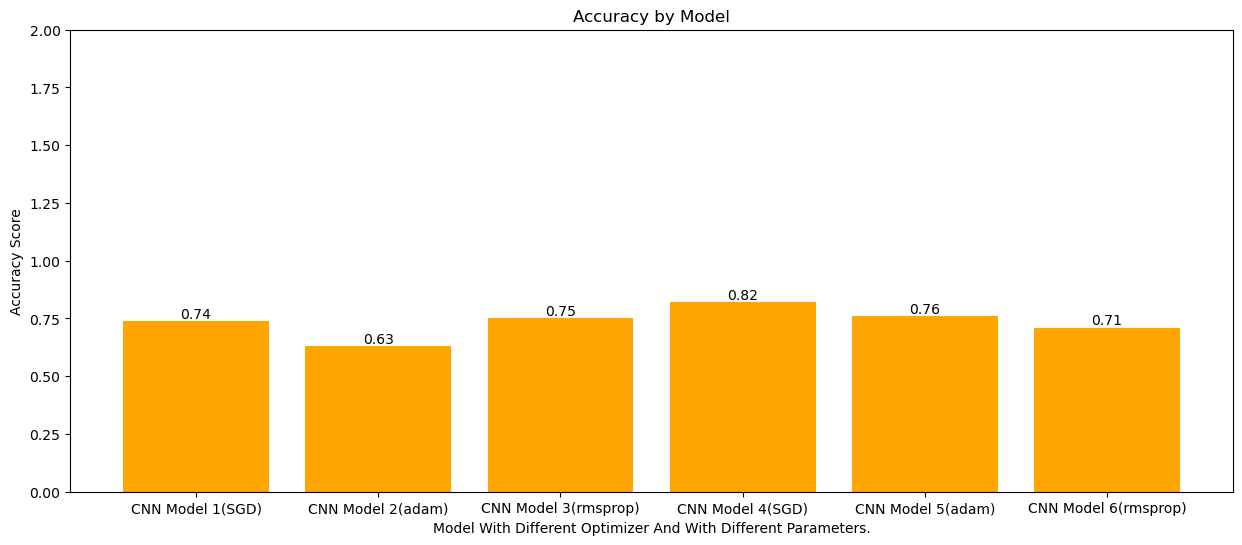

In [34]:
import matplotlib.pyplot as plt

labels = ['CNN Model 1(SGD)', 'CNN Model 2(adam)', 'CNN Model 3(rmsprop)','CNN Model 4(SGD)', 'CNN Model 5(adam)', 'CNN Model 6(rmsprop)']

accuracies = [accuracy1, accuracy2, accuracy3,0.82, 0.76, 0.71]

plt.figure(figsize=(15,6))
bars = plt.bar(labels, accuracies, color='orange')
plt.xlabel('Model With Different Optimizer And With Different Parameters.')
plt.ylabel('Accuracy Score')
plt.title('Accuracy by Model')
plt.ylim(0, 2) 

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()


Prediction of the skin Cancer

In [191]:

test_image = tf.keras.utils.load_img('./new_image.jpg',target_size= (64,64))

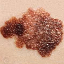

In [192]:
test_image

In [193]:
test_image = tf.keras.utils.img_to_array(test_image)

In [194]:
test_image = np.expand_dims(test_image,axis=0)
test_image

array([[[[237., 205., 184.],
         [233., 201., 180.],
         [234., 202., 181.],
         ...,
         [235., 203., 182.],
         [235., 203., 182.],
         [235., 203., 182.]],

        [[239., 207., 186.],
         [230., 198., 177.],
         [231., 199., 178.],
         ...,
         [234., 202., 181.],
         [234., 202., 181.],
         [229., 197., 176.]],

        [[236., 204., 183.],
         [232., 200., 179.],
         [237., 205., 184.],
         ...,
         [230., 198., 177.],
         [234., 202., 181.],
         [236., 204., 183.]],

        ...,

        [[219., 184., 156.],
         [217., 182., 154.],
         [223., 188., 160.],
         ...,
         [226., 193., 174.],
         [223., 190., 171.],
         [227., 194., 175.]],

        [[221., 186., 158.],
         [222., 187., 159.],
         [222., 187., 159.],
         ...,
         [221., 189., 164.],
         [217., 185., 162.],
         [224., 192., 167.]],

        [[224., 190., 163.],
       

In [195]:
result = cnn1.predict(test_image)
result

1/1 [==============================] - 0s 40ms/step


array([[0.]], dtype=float32)

In [196]:
if result[0][0] == 0:
  prediction = 'Cancer'
else:
  prediction = 'Non_Cancer'

print(prediction)

Cancer


Model Save and Prediction 

In [43]:
cnn1.save('cnn1_model.h5')

Found 84 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step


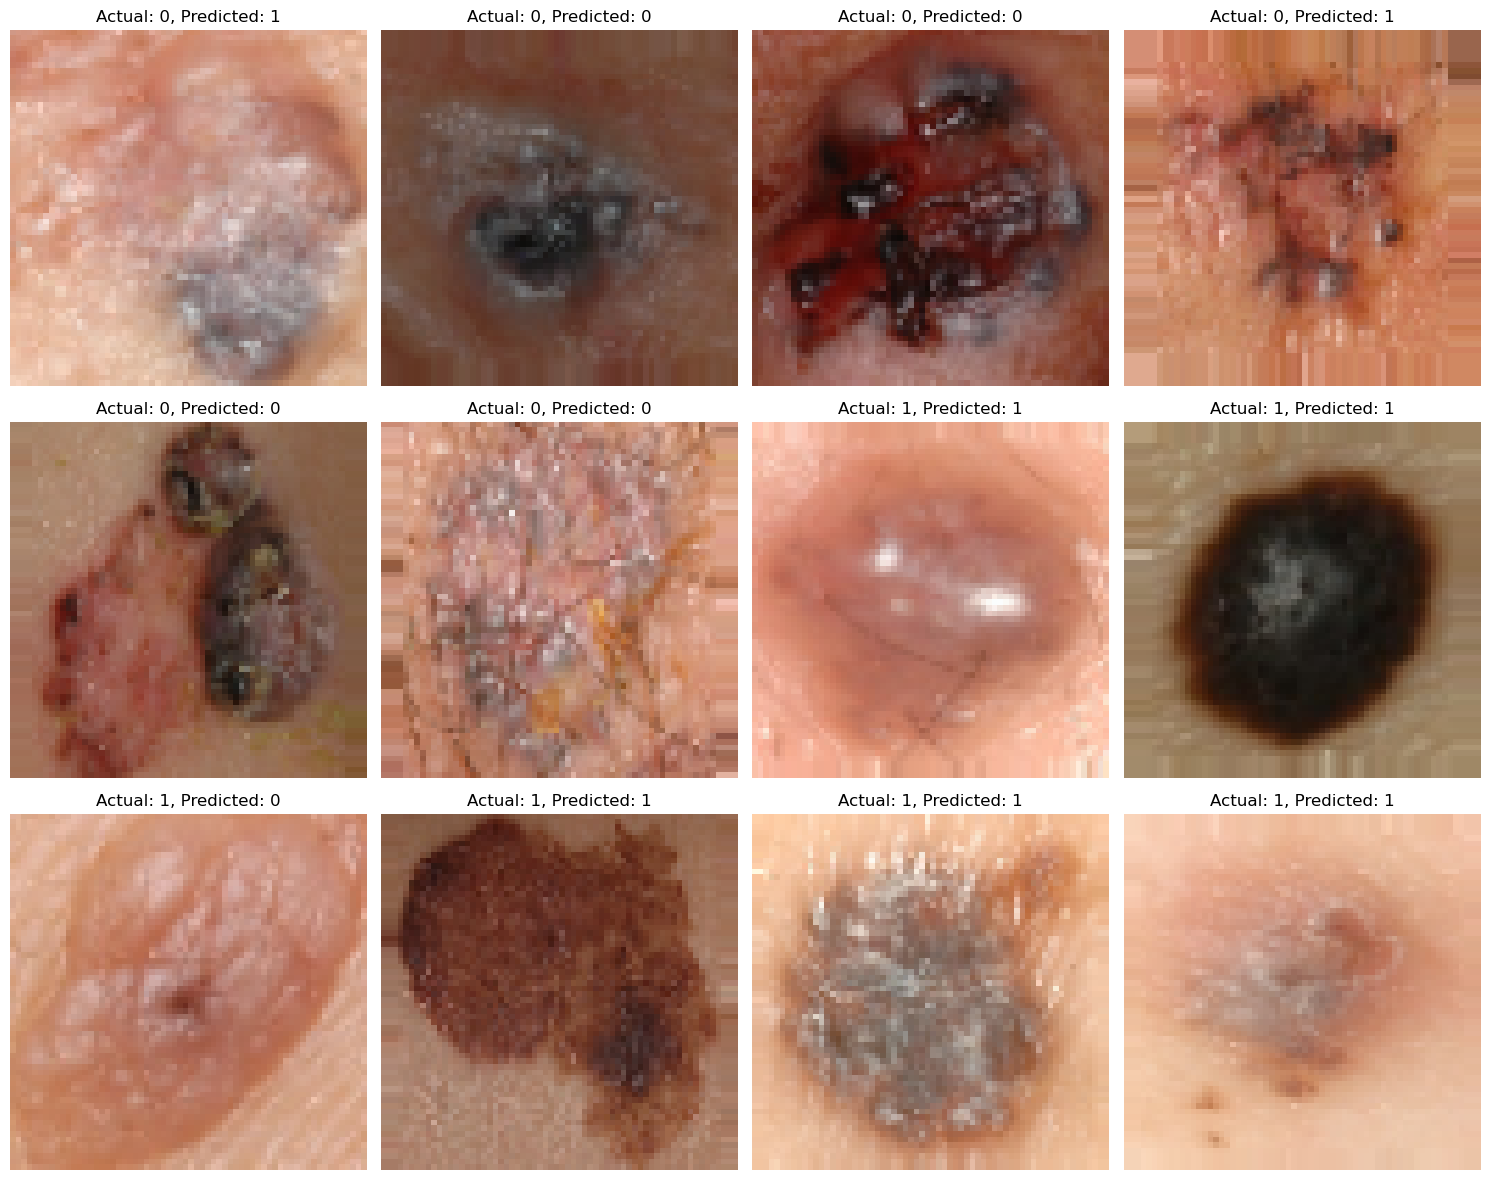

In [13]:

loaded_model = tf.keras.models.load_model('cnn1_model.h5')

test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_set = test_datagen.flow_from_directory('./Skin_Data/Cancer_Non_Cancer/test',
                                            target_size=(64, 64),
                                            batch_size=7,
                                            class_mode='binary',
                                            shuffle=False)

num_images_to_show = 12
num_cols = 4
num_rows = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
axes = axes.ravel()

for i in range(num_images_to_show):
    image, label = test_set[i]
    image = image[0]  
    label = int(label[0])  
 
    predicted_label = loaded_model.predict(tf.expand_dims(image, axis=0))[0][0]
    predicted_label = round(predicted_label)
    
    axes[i].imshow(image)
    axes[i].set_title(f'Actual: {label}, Predicted: {predicted_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

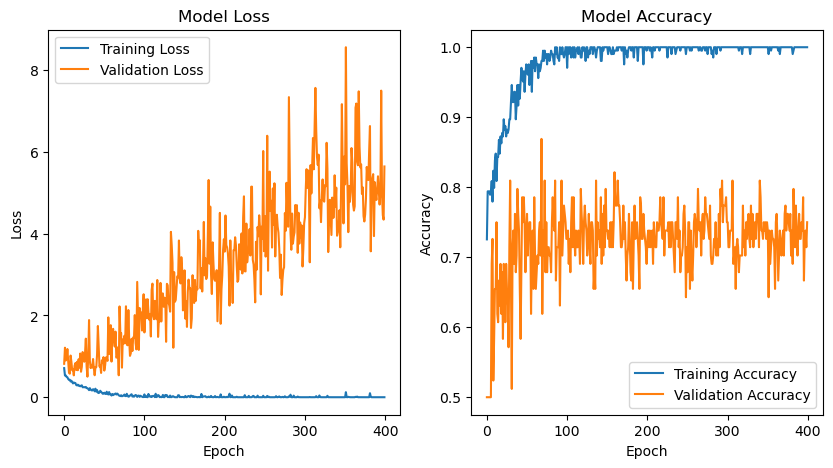

In [35]:
def plot_training_history(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(measures)